# 9 Final Model Evaluation

In [1]:
import os
import glob
import joblib
import json
import pandas as pd
import numpy as np
import mlflow
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import warnings
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from pathlib import Path
from datetime import datetime
import time

from IPython.display import Image, display;

from src.utils import resolve_path, load_latest_artifact
from src.evaluation import (
    export_summary,
    unwrap_best_estimators_non_smote,
    unwrap_best_estimators_smote,
    plot_roc_across_datasets,
    plot_pr,
    plot_roc_curves,
    plot_delta_auroc_bar,
    plot_bar_comparison,
    plot_shap_summary,
    plot_shap_dependence,
)

from src.models import get_classifiers
classifiers = get_classifiers()


# Global settings
sns.set_style("whitegrid")
sns.set_context("talk")
plt.rcParams["figure.dpi"] = 120
warnings.filterwarnings("ignore", message="X does not have valid feature names")
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", message="The NumPy global RNG was seeded")

In [2]:
import mlflow
mlflow.set_tracking_uri(resolve_path("mlflow_tracking"))
exp = mlflow.get_experiment("169692831354922862")
print(exp.name)

Thesis_ModelTraining


✅ MLflow evaluation run started under experiment 'Thesis_ModelTraining'
💾 Saved and logged merged model comparison summary to C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\evaluation\opt_model_comparison_summary.csv
📊 Logged comparison bar plot to MLflow and saved to C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\plots\w2v_optimized_radiology\holdout_auroc_comparison.png
✅ Summary exported to C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\evaluation\20251031\final_model_summary_20251031_summary.csv
Logged ΔAUROC (optimized vs original) = 0.0408
Logged ΔAUROC (optimized vs w2v baseline) = 0.0259

📦 Loading all baseline and optimized W2V models for evaluation and interpretation
📂 Using latest run folder for original_baseline → original_baseline_20251027_0818
✅ Loaded best               | Baseline
✅ Loaded best               | SMOTE
✅ Loaded CatBoost     

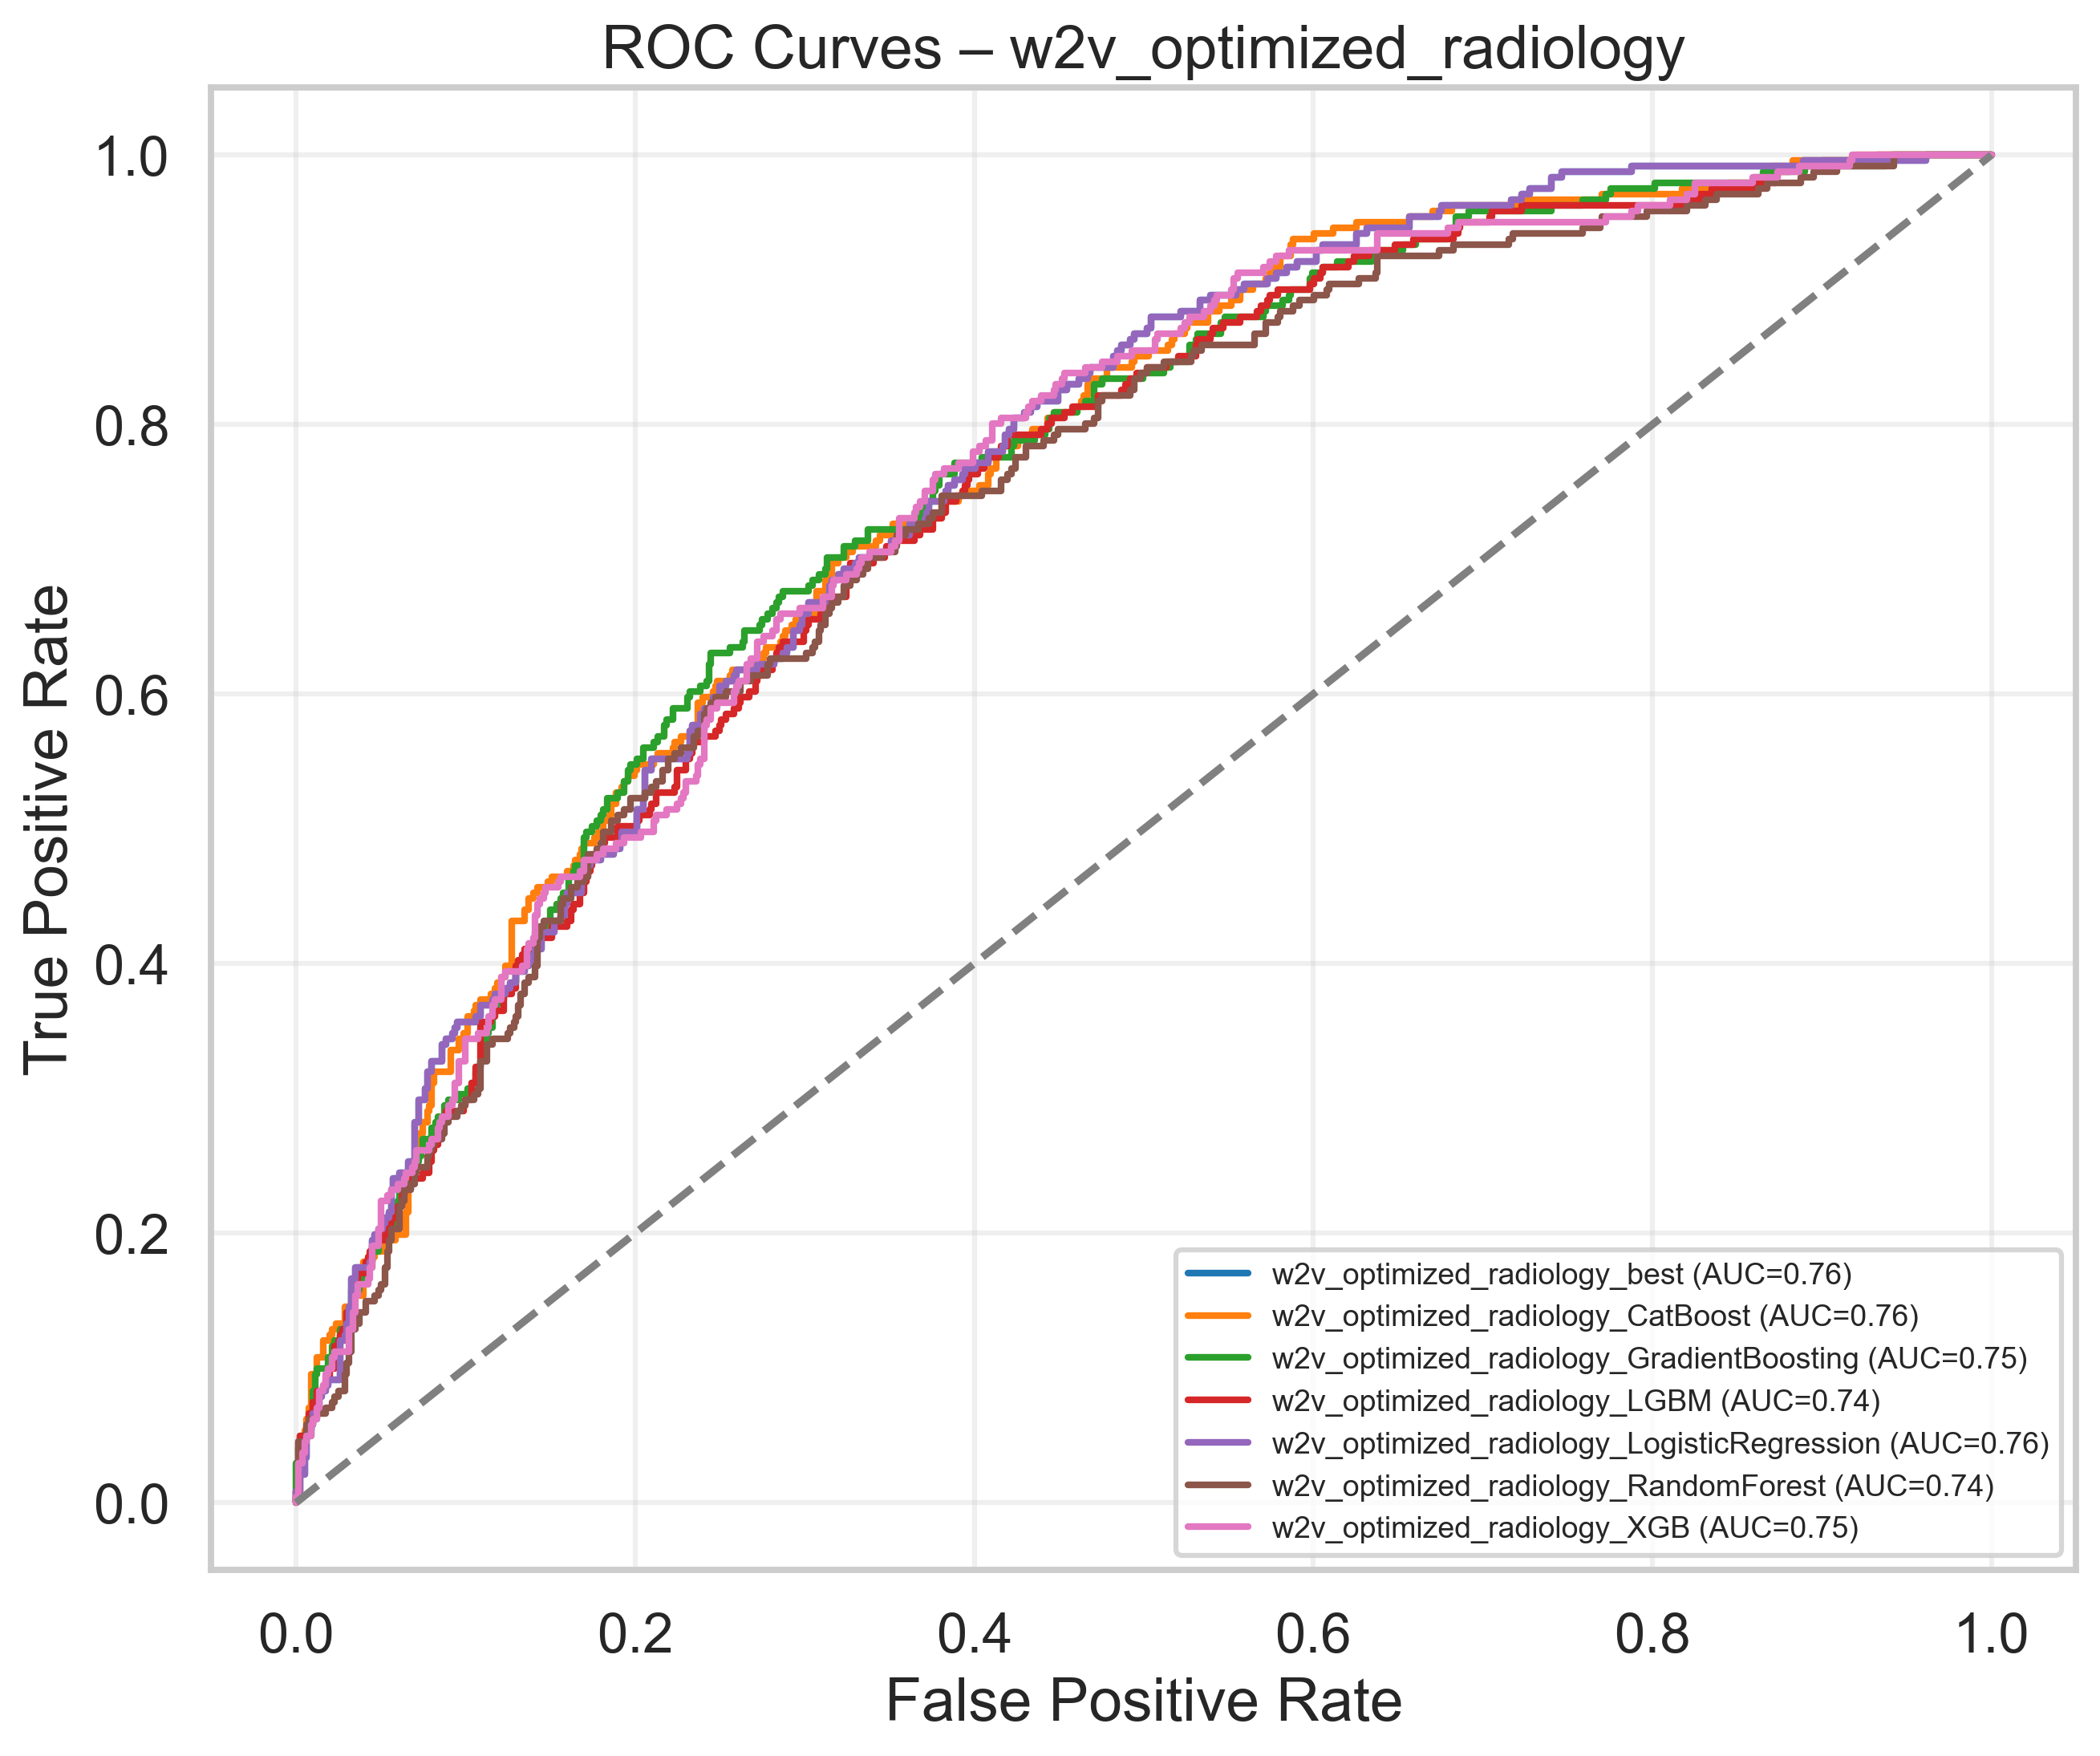

📈 ROC curves saved → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\ROC_all.png


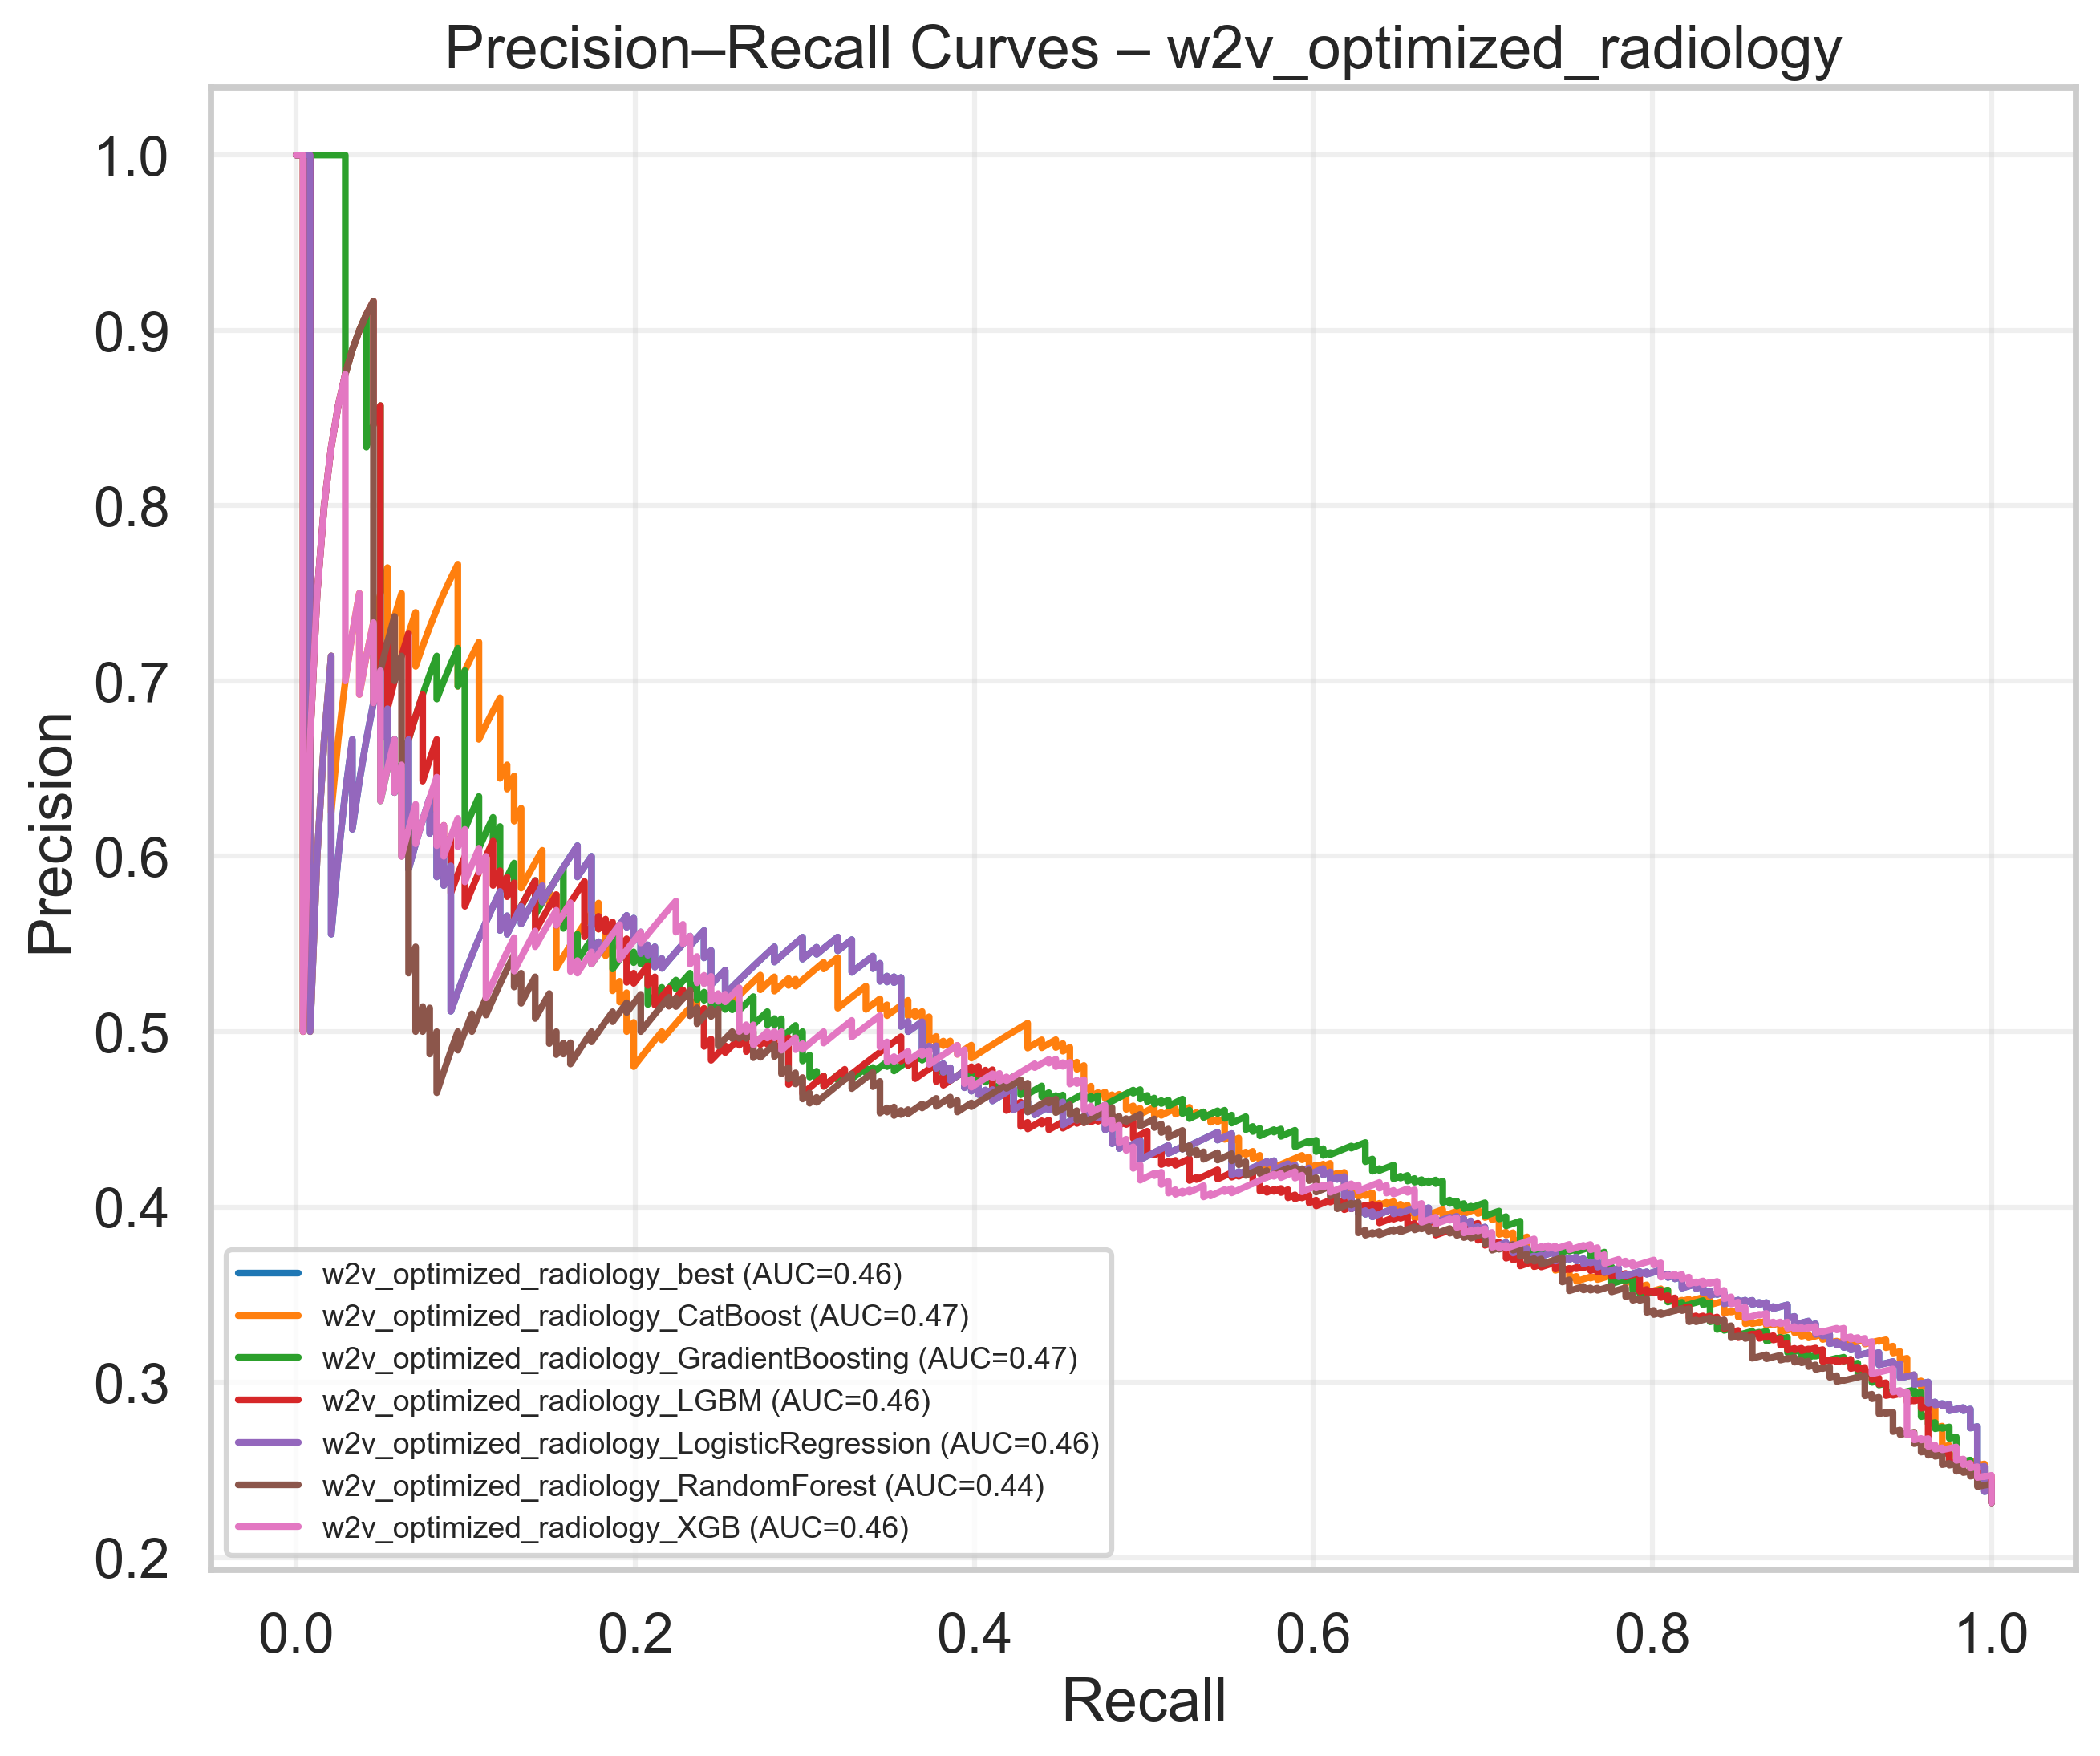

📊 PR curves saved → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\PR_all.png
📊 Bar chart saved → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\plots\final_holdout\20251031\holdout_auroc_comparison.png


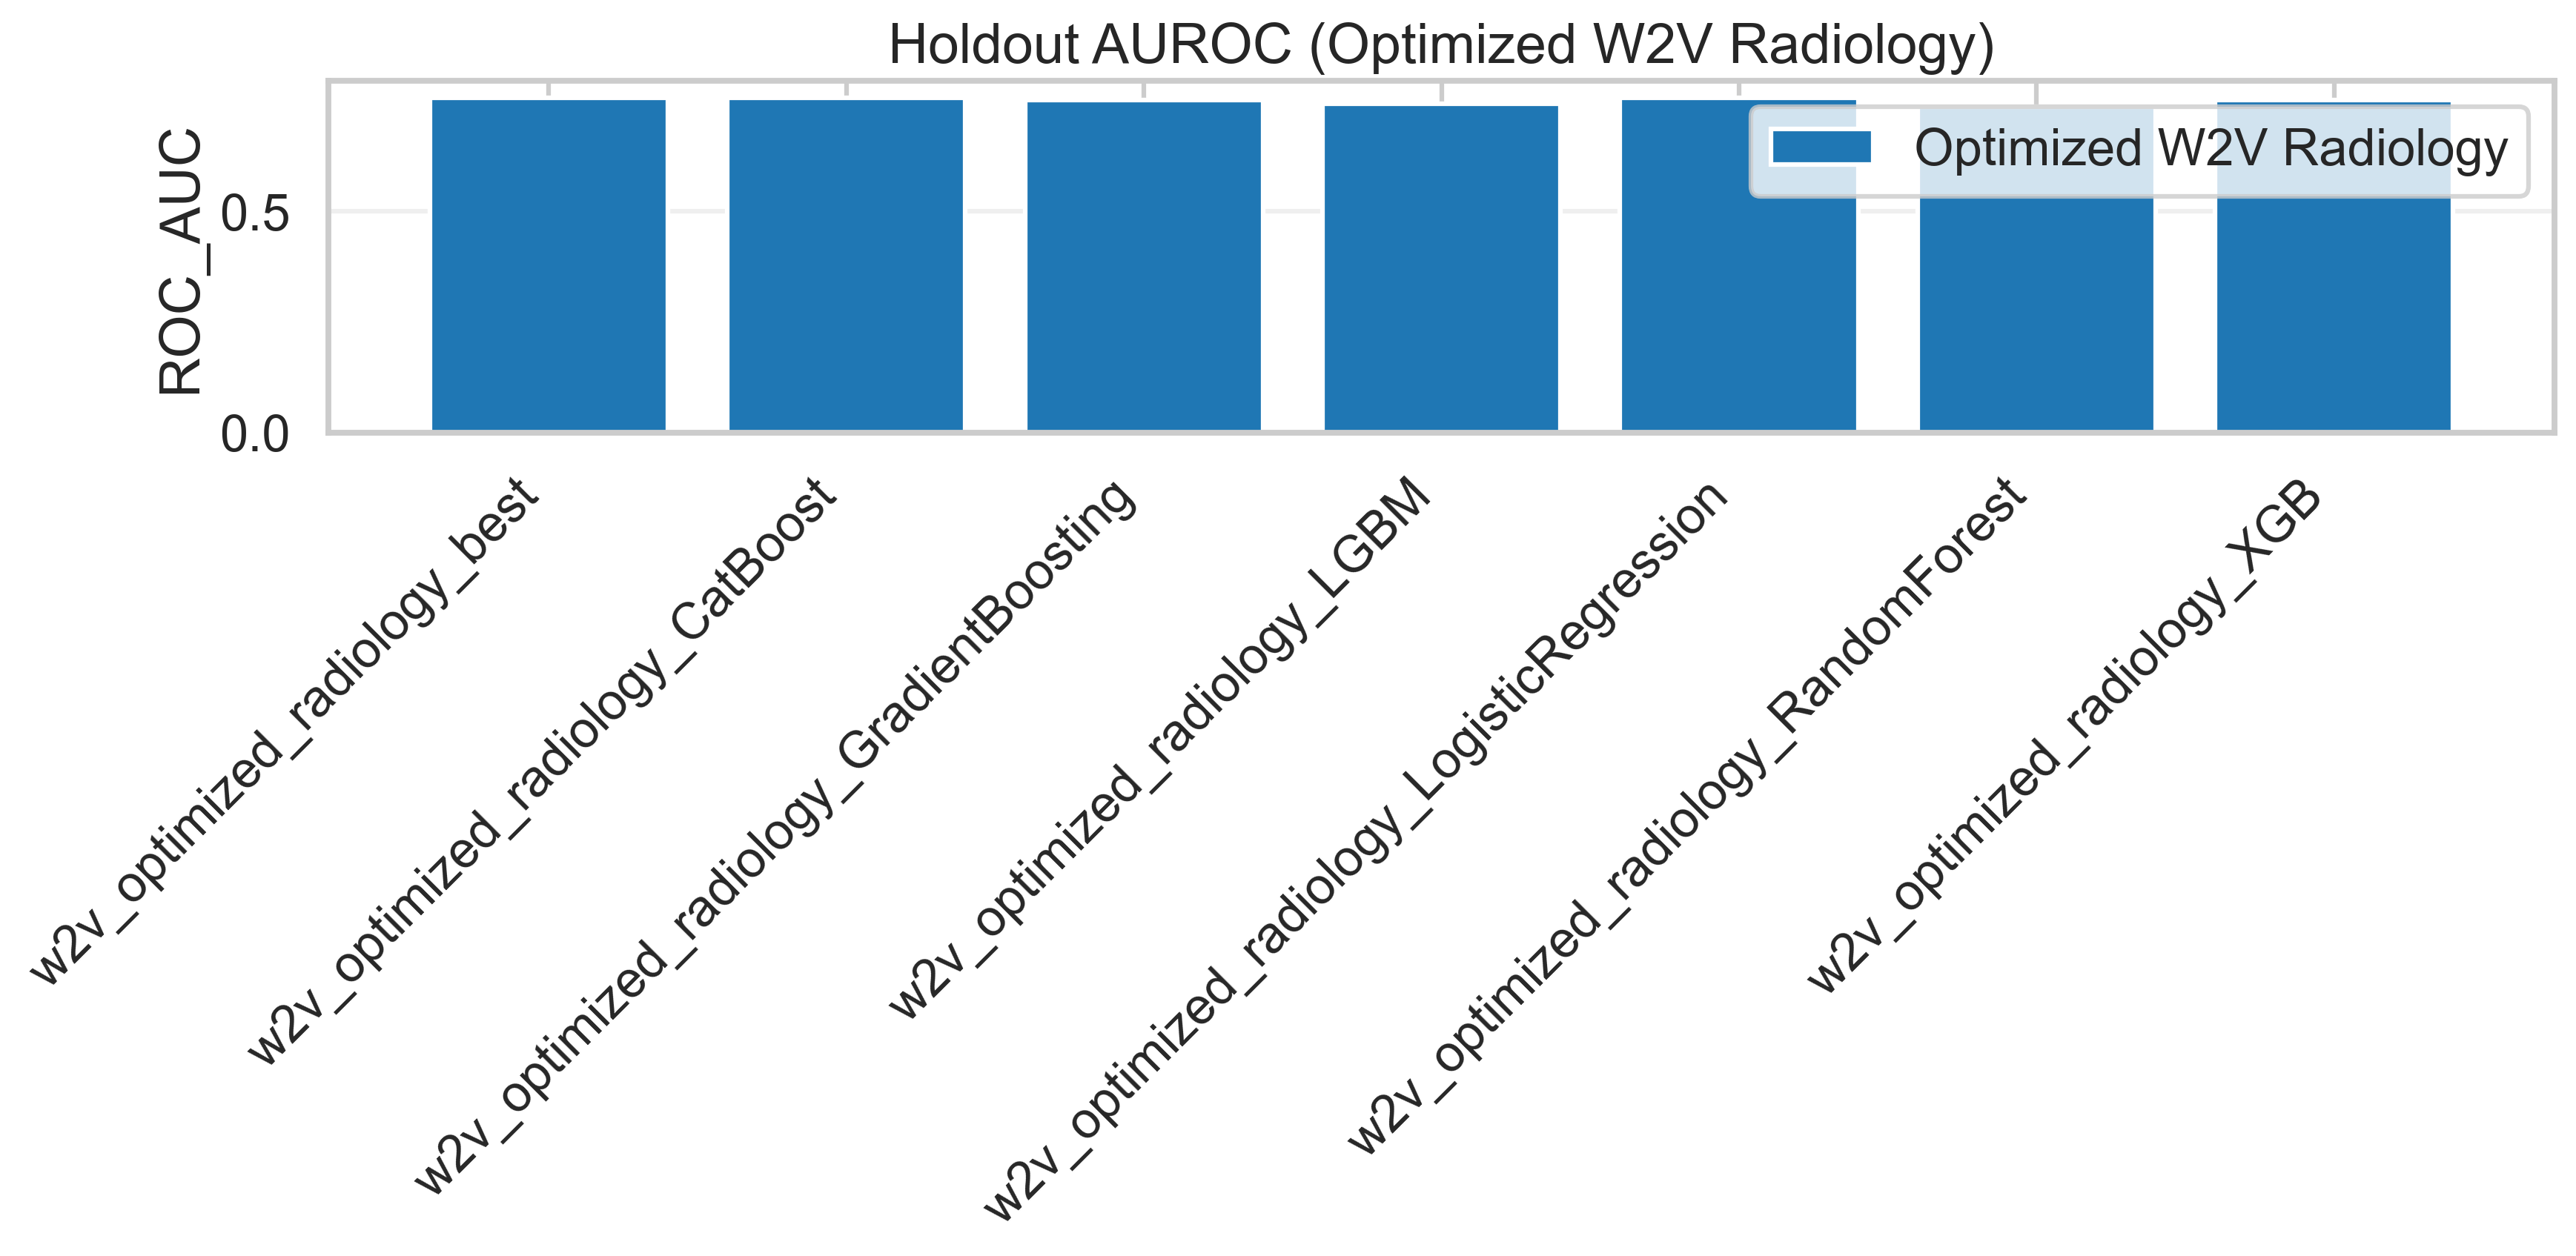

📊 ΔAUROC grouped comparison chart saved → results/plots/final_holdout/20251031/delta_auroc_comparison_grouped.png


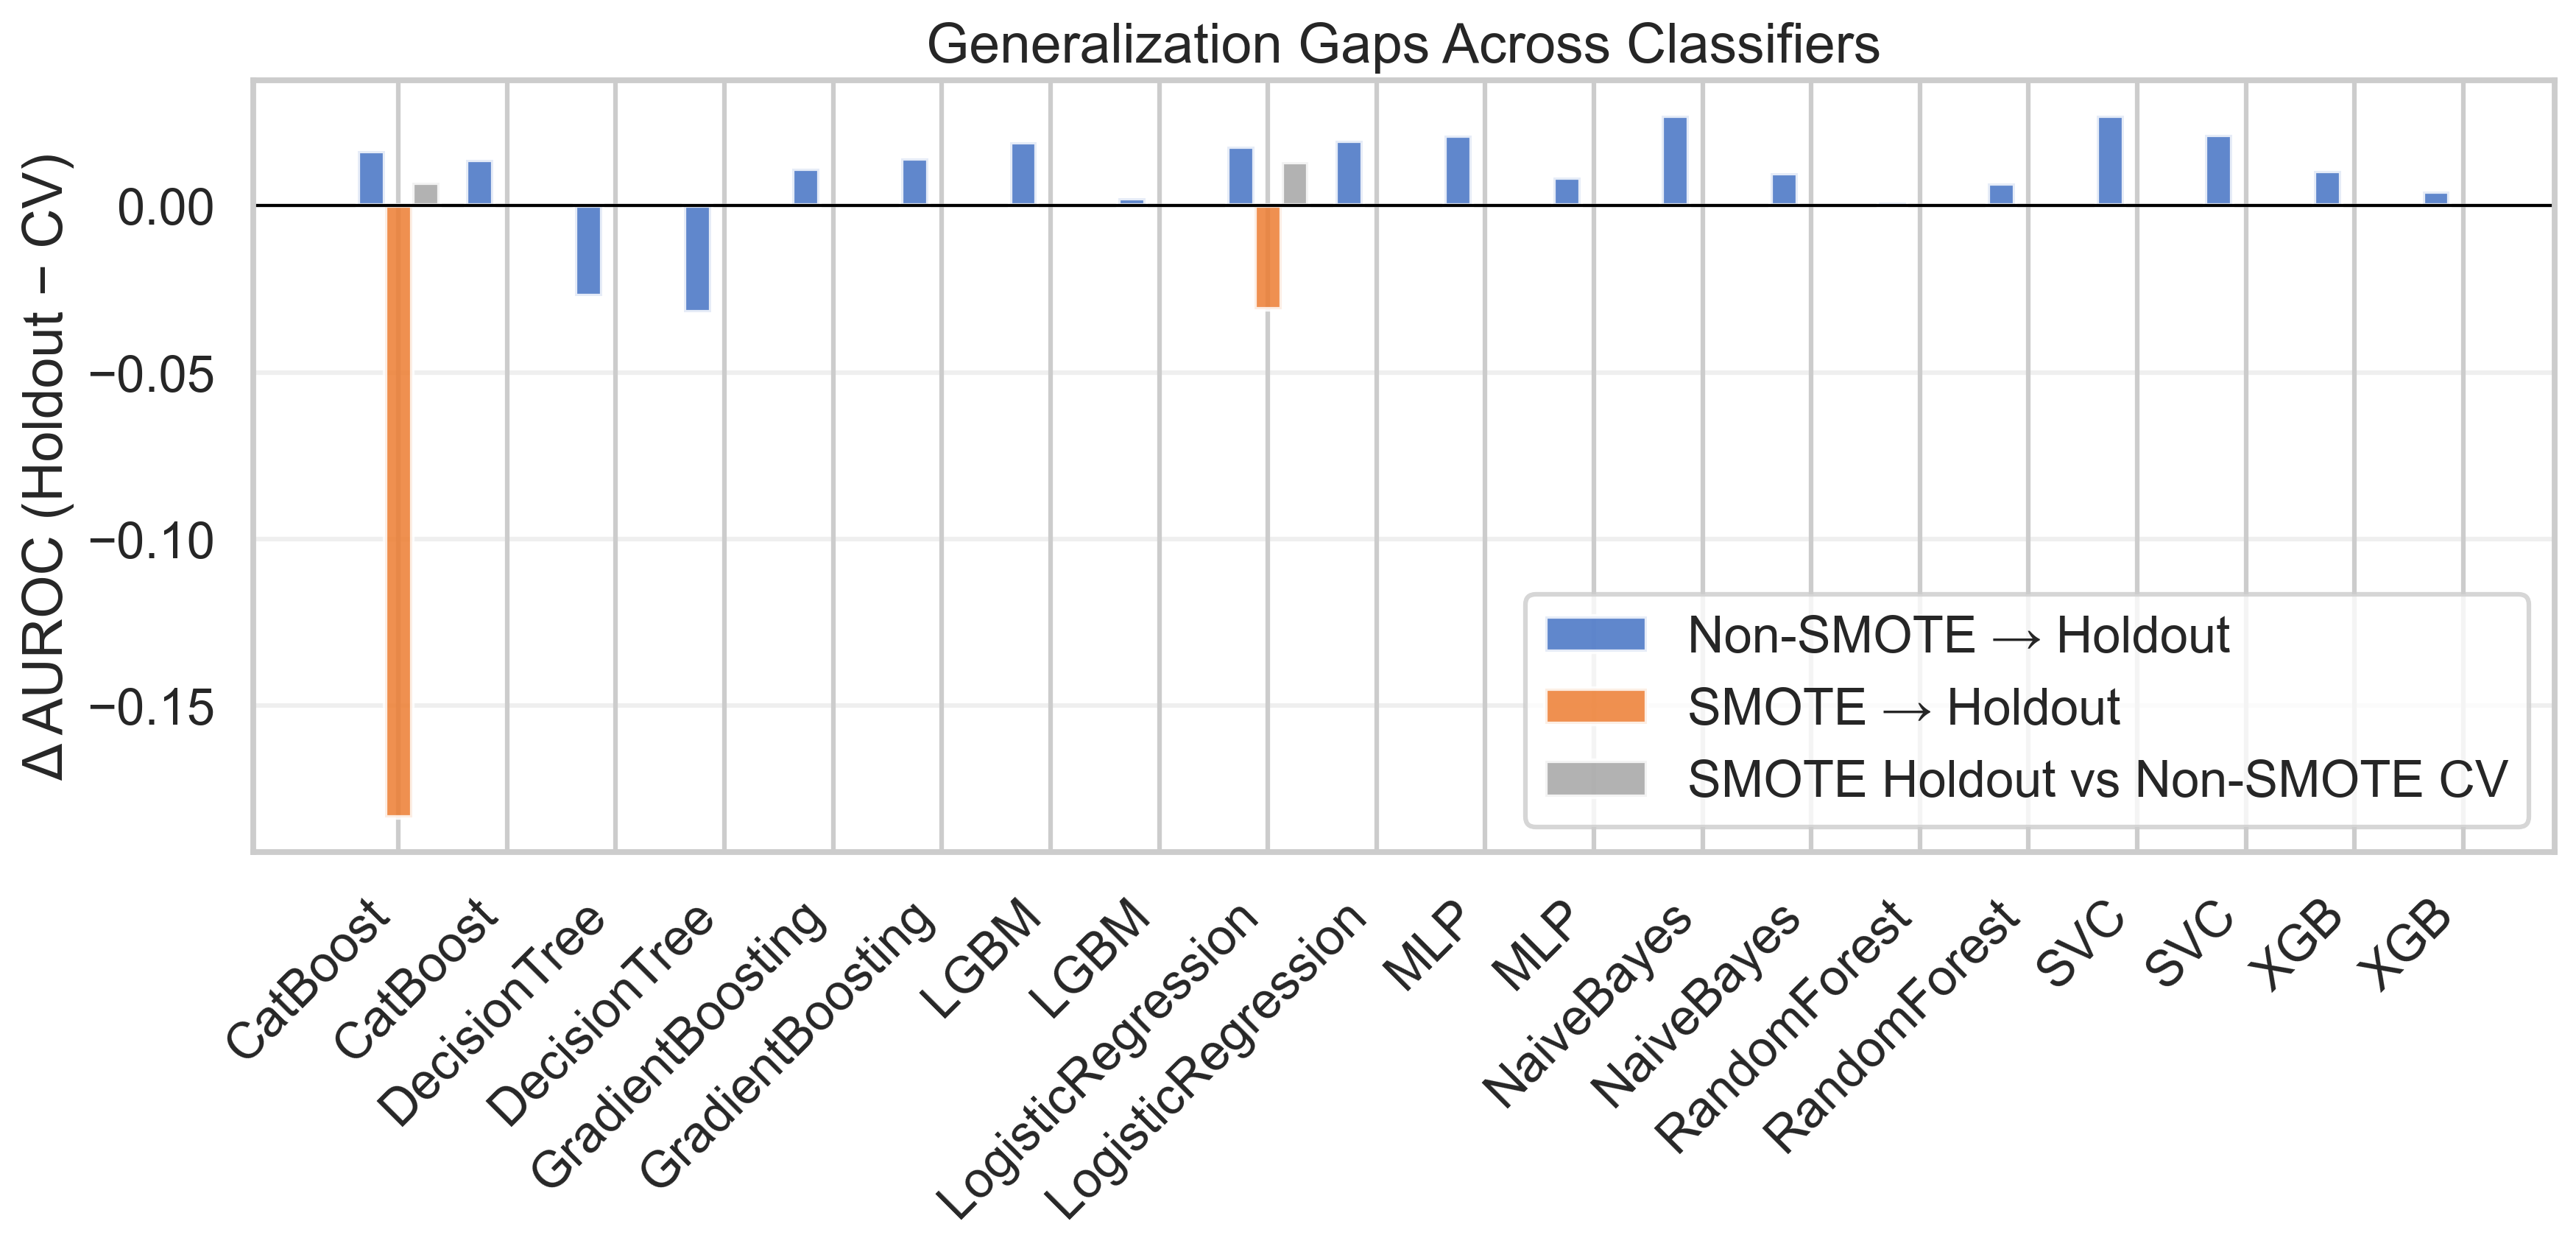

✅ Final holdout visualizations logged → results/plots/final_holdout/20251031


Metric,CV Mean AUC,CV Std AUC,Holdout Mean AUC,ΔAUROC (Mean),ΔAUROC (Std),Improved (Δ>0),Decreased (Δ<0)
Non-SMOTE → Holdout,0.706300,0.015700,0.715900,0.009600,0.015300,18,2
SMOTE → Holdout,0.848100,0.012400,0.736200,-0.107300,0.107700,0,2
SMOTE Holdout vs Non-SMOTE CV,0.706300,0.015700,0.736200,0.010000,0.004300,2,0


📄 ΔAUROC summary table (with CV stds) saved → results/evaluation/20251031/delta_auroc_summary_stats_with_std.csv
📄 LaTeX table exported → results\evaluation\20251031\delta_auroc_summary_table.tex

✅ Logged all evaluation artifacts to MLflow under results/plots/final_holdout/20251031 and results/evaluation/20251031


📈 Starting SHAP + Coefficient Explainability for optimized W2V NON-SMOTE models

🔍 Explainability for best (w2v_optimized_radiology) [non-SMOTE]


PermutationExplainer explainer: 1043it [01:02, 15.37it/s]                                                              


📊 Saved SHAP summary → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\shap_summary_w2v_optimized_radiology_non_smote_best.png
⚠️ Dependence SHAP failed for best: Invalid SHAP output shape for dependence plot.
🪄 Fallback: saved permutation importance plot → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\perm_importance_w2v_optimized_radiology_non_smote_best.png

🔍 Explainability for CatBoost (w2v_optimized_radiology) [non-SMOTE]


 99%|===================| 1029/1042 [01:24<00:01]        

📊 Saved SHAP summary → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\shap_summary_w2v_optimized_radiology_non_smote_CatBoost.png
📈 Saved dependence plot → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\shap_dependence_w2v_optimized_radiology_non_smote_CatBoost_avg_urineoutput.png

🔍 Explainability for GradientBoosting (w2v_optimized_radiology) [non-SMOTE]


 93%|=================== | 965/1042 [00:12<00:00]       

📊 Saved SHAP summary → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\shap_summary_w2v_optimized_radiology_non_smote_GradientBoosting.png
📈 Saved dependence plot → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\shap_dependence_w2v_optimized_radiology_non_smote_GradientBoosting_avg_urineoutput.png

🔍 Explainability for LGBM (w2v_optimized_radiology) [non-SMOTE]


 98%|===================| 1017/1042 [00:34<00:00]       

📊 Saved SHAP summary → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\shap_summary_w2v_optimized_radiology_non_smote_LGBM.png
📈 Saved dependence plot → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\shap_dependence_w2v_optimized_radiology_non_smote_LGBM_avg_urineoutput.png

🔍 Explainability for LogisticRegression (w2v_optimized_radiology) [non-SMOTE]
📊 Saved coefficient plot → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\coefficients_w2v_optimized_radiology_non_smote_LogisticRegression.png

🔍 Explainability for RandomForest (w2v_optimized_radiology) [non-SMOTE]


100%|===================| 2082/2084 [08:34<00:00]        

📊 Saved SHAP summary → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\shap_summary_w2v_optimized_radiology_non_smote_RandomForest.png
📈 Saved dependence plot → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\shap_dependence_w2v_optimized_radiology_non_smote_RandomForest_avg_urineoutput.png

🔍 Explainability for XGB (w2v_optimized_radiology) [non-SMOTE]


 99%|===================| 1034/1042 [00:58<00:00]       

📊 Saved SHAP summary → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\shap_summary_w2v_optimized_radiology_non_smote_XGB.png
📈 Saved dependence plot → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\shap_dependence_w2v_optimized_radiology_non_smote_XGB_avg_urineoutput.png
🏁 Completed SHAP and coefficient explainability for all optimized W2V NON-SMOTE models.

📈 Starting SHAP + Coefficient Explainability for optimized W2V SMOTE models
🔍 Explainability for best (w2v_optimized_radiology_best) [SMOTE]

🔍 Explainability for best (w2v_optimized_radiology_best)


PermutationExplainer explainer: 1043it [00:54, 15.70it/s]                                                              


📊 Saved SHAP summary for best → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\shap_summary_w2v_optimized_radiology_smote_best.png
⚠️ Dependence SHAP failed for best: Invalid SHAP output shape for dependence plot.
🪄 Fallback: saved permutation importance plot for best → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\perm_importance_w2v_optimized_radiology_smote_best.png
🔍 Explainability for CatBoost (w2v_optimized_radiology_CatBoost) [SMOTE]

🔍 Explainability for CatBoost (w2v_optimized_radiology_CatBoost)


100%|===================| 1041/1042 [01:21<00:00]        

📊 Saved SHAP summary for CatBoost → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\shap_summary_w2v_optimized_radiology_smote_CatBoost.png
📈 Saved dependence plot for CatBoost → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\shap_dependence_w2v_optimized_radiology_smote_CatBoost_avg_urineoutput.png
🔍 Explainability for GradientBoosting (w2v_optimized_radiology_GradientBoosting) [SMOTE]

🔍 Explainability for GradientBoosting (w2v_optimized_radiology_GradientBoosting)


 96%|=================== | 1004/1042 [00:13<00:00]       

📊 Saved SHAP summary for GradientBoosting → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\shap_summary_w2v_optimized_radiology_smote_GradientBoosting.png
📈 Saved dependence plot for GradientBoosting → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\shap_dependence_w2v_optimized_radiology_smote_GradientBoosting_avg_urineoutput.png
🔍 Explainability for LGBM (w2v_optimized_radiology_LGBM) [SMOTE]

🔍 Explainability for LGBM (w2v_optimized_radiology_LGBM)


 99%|===================| 1036/1042 [00:42<00:00]        

📊 Saved SHAP summary for LGBM → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\shap_summary_w2v_optimized_radiology_smote_LGBM.png
📈 Saved dependence plot for LGBM → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\shap_dependence_w2v_optimized_radiology_smote_LGBM_avg_urineoutput.png
🔍 Explainability for LogisticRegression (w2v_optimized_radiology_LogisticRegression) [SMOTE]

🔍 Explainability for LogisticRegression (w2v_optimized_radiology_LogisticRegression)
📊 Saved coefficient plot → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\coefficients_w2v_optimized_radiology_LogisticRegression.png
🔍 Explainability for RandomForest (w2v_optimized_radiology_RandomForest) [SMOTE]

🔍 Explainability for RandomForest (w2v_optimized_radiology_RandomForest)


100%|===================| 2083/2084 [11:02<00:00]        

📊 Saved SHAP summary for RandomForest → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\shap_summary_w2v_optimized_radiology_smote_RandomForest.png
⚠️ Dependence SHAP failed for RandomForest: Invalid SHAP output shape for dependence plot.
🪄 Fallback: saved permutation importance plot for RandomForest → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\perm_importance_w2v_optimized_radiology_smote_RandomForest.png
🔍 Explainability for XGB (w2v_optimized_radiology_XGB) [SMOTE]

🔍 Explainability for XGB (w2v_optimized_radiology_XGB)


100%|===================| 1041/1042 [01:04<00:00]        

📊 Saved SHAP summary for XGB → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\shap_summary_w2v_optimized_radiology_smote_XGB.png
📈 Saved dependence plot for XGB → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\shap_dependence_w2v_optimized_radiology_smote_XGB_avg_urineoutput.png
🏁 Completed SHAP and coefficient explainability for all optimized W2V SMOTE models.
📁 Calibration figures will be saved to: C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\calibration

📏 Calibration: best (w2v_optimized_radiology)
📊 Saved → C:\Users\tyler\OneDrive - University of Pittsburgh\BIOST 2021 Thesis\Masters-Thesis\results\figures\w2v_optimized_radiology\calibrations\calibration_w2v_optimized_radiology_best.png
Saved calibration plot for optimized variant: best

📏 Calibration: CatBoost (w2v_optimized_

In [4]:
# ==================================================
# Full Evaluation with MLflow Logging
# ==================================================

# --- Set up MLflow experiment (same as training phase) ---
tracking_dir = Path(resolve_path("mlflow_tracking")).absolute()
mlflow.set_tracking_uri(tracking_dir.as_uri())

experiment_name = "Thesis_ModelTraining"
mlflow.set_experiment(experiment_name)

with mlflow.start_run(run_name="final_model_evaluation", nested=False):
    print(f"✅ MLflow evaluation run started under experiment '{experiment_name}'")

    # --------------------------------------------------
    # Aggregate & Compare Results vs Baseline + Original
    # --------------------------------------------------
    summary_orig = pd.read_csv(resolve_path("reports/20251027/original_baseline_20251027_summary.csv"))
    summary_w2v_radiology = pd.read_csv(resolve_path("reports/20251027/w2v_radiology_baseline_20251027_summary.csv"))
    summary_w2v_opt_radiology = pd.read_csv(resolve_path("reports/20251028/w2v_optimized_radiology_20251028_summary.csv"))

    for df, tag in [(summary_orig, "original"),
                    (summary_w2v_radiology, "w2v_radiology"),
                    (summary_w2v_opt_radiology, "w2v_optimized_radiology")]:
        df["Dataset"] = tag

    comparison_all = pd.concat([summary_orig, summary_w2v_radiology, summary_w2v_opt_radiology], ignore_index=True)
    comparison_path = resolve_path("results/evaluation/opt_model_comparison_summary.csv")
    os.makedirs(os.path.dirname(comparison_path), exist_ok=True)
    comparison_all.to_csv(comparison_path, index=False)
    mlflow.log_artifact(str(comparison_path), artifact_path="summaries")
    print(f"💾 Saved and logged merged model comparison summary to {comparison_path}")

    # --------------------------------------------------
    # Evaluate & Visualize Performance vs Prior Models
    # --------------------------------------------------
    import matplotlib.pyplot as plt
    import seaborn as sns

    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(
        data=comparison_all,
        x="Classifier",
        y="Holdout ROC-AUC",
        hue="Dataset",
        ax=ax
    )
    ax.set_title("Holdout AUROC Across Dataset Variants")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

    fig_path = resolve_path("results/plots/w2v_optimized_radiology/holdout_auroc_comparison.png")
    os.makedirs(os.path.dirname(fig_path), exist_ok=True)
    fig.savefig(fig_path, bbox_inches="tight", dpi=300)
    mlflow.log_artifact(str(fig_path), artifact_path="plots")
    plt.close(fig)
    print(f"📊 Logged comparison bar plot to MLflow and saved to {fig_path}")

    # --------------------------------------------------
    # Summarize & Export Final Metrics for Thesis
    # --------------------------------------------------
    from src.evaluation import export_summary
    from datetime import datetime
    
    # Aggregate mean ROC-AUC metrics per dataset
    final_summary = (
        comparison_all.groupby(["Dataset"], as_index=False)[
            ["Holdout ROC-AUC", "Holdout ROC-AUC (SMOTE)"]
        ]
        .mean()
        .round(4)
    )
    
    # Use project-standard export_summary() to save with timestamp
    final_export_path = export_summary(
        final_summary,
        mode="final_model_summary",
        save_prefix="results/evaluation",
        include_time=False
    )
    
    # Log the generated summary CSV to MLflow
    mlflow.log_artifact(str(final_export_path), artifact_path="exports")
    
    # --------------------------------------------------
    # Log key AUC deltas for dashboarding
    # --------------------------------------------------
    auc_opt = final_summary.loc[final_summary["Dataset"] == "w2v_optimized_radiology", "Holdout ROC-AUC"].values[0]
    auc_w2v = final_summary.loc[final_summary["Dataset"] == "w2v_radiology", "Holdout ROC-AUC"].values[0]
    auc_orig = final_summary.loc[final_summary["Dataset"] == "original", "Holdout ROC-AUC"].values[0]
    
    # Primary: optimized vs original baseline
    delta_auc_primary = auc_opt - auc_orig
    mlflow.log_metric("delta_auc_optimized_vs_original", float(delta_auc_primary))
    print(f"Logged ΔAUROC (optimized vs original) = {delta_auc_primary:.4f}")
    
    # Secondary: optimized vs W2V baseline
    delta_auc_secondary = auc_opt - auc_w2v
    mlflow.log_metric("delta_auc_optimized_vs_w2v_baseline", float(delta_auc_secondary))
    print(f"Logged ΔAUROC (optimized vs w2v baseline) = {delta_auc_secondary:.4f}")


    # ==================================================
    # From 06 10 Load Top Models (Baseline + Optimized Variants)
    # ==================================================
    print("\n📦 Loading all baseline and optimized W2V models for evaluation and interpretation")
    
    # ----------------------------------------------------------
    # 1️⃣ Setup
    # ----------------------------------------------------------
    model_variants = [
        "original_baseline",
        "w2v_radiology_baseline",
        "w2v_optimized_radiology"
    ]
    loaded_models_baseline, loaded_models_smote = {}, {}
    
    # ----------------------------------------------------------
    # 2️⃣ Locate and load all *_model.pkl files
    # ----------------------------------------------------------
    for variant in model_variants:
        variant_dir = Path(resolve_path(f"results/models/{variant}"))
        if not variant_dir.exists():
            print(f"⚠️ No results directory found for {variant} → {variant_dir}")
            continue
    
        subdirs = sorted(
            [p for p in variant_dir.iterdir() if p.is_dir()],
            key=lambda x: x.stat().st_mtime,
            reverse=True
        )
        if not subdirs:
            print(f"⚠️ No run folders found for {variant}")
            continue
    
        latest_run = subdirs[0]
        print(f"📂 Using latest run folder for {variant} → {latest_run.name}")
    
        pattern = str(resolve_path(f"{latest_run}/*.pkl"))
        all_model_files = [
            f for f in glob.glob(pattern)
            if "_model.pkl" in f and "_full" not in f
        ]
        if not all_model_files:
            print(f"⚠️ No individual model.pkl files found in {latest_run}")
            continue
    
        for file in all_model_files:
            file_path = Path(file)
            name = file_path.stem
            model = joblib.load(file_path)
            parts = name.split("_")
    
            # Detect classifier and SMOTE status
            if name.lower().endswith("smote_model"):
                clf_name = parts[-3]
                # Keep "_baseline" suffix only for the first two variants
                key = f"{variant}_{clf_name}_smote" if "optimized" in variant else f"{variant}_{clf_name}_smote_baseline"
                loaded_models_smote[key] = model
                tag = "SMOTE"
            else:
                clf_name = parts[-2]
                # Similarly, avoid "_baseline" for optimized variant
                key = f"{variant}_{clf_name}" if "optimized" in variant else f"{variant}_{clf_name}"
                loaded_models_baseline[key] = model
                tag = "Baseline"

    
            print(f"✅ Loaded {clf_name:<18} | {tag}")
    
    # ----------------------------------------------------------
    # 3️⃣ Unwrap nested estimators
    # ----------------------------------------------------------
    loaded_models_baseline = unwrap_best_estimators_non_smote(loaded_models_baseline)
    loaded_models_smote    = unwrap_best_estimators_smote(loaded_models_smote)
    
    # ----------------------------------------------------------
    # 4️⃣ Summary + manifest
    # ----------------------------------------------------------
    print("\n📊 Summary of loaded models")
    print(f"Baseline models → {len(loaded_models_baseline)}")
    print(f"SMOTE models    → {len(loaded_models_smote)}")
    print("Baseline keys:", list(loaded_models_baseline.keys()))
    print("SMOTE keys:", list(loaded_models_smote.keys()))
    
    manifest = {
        "baseline_keys": list(loaded_models_baseline.keys()),
        "smote_keys": list(loaded_models_smote.keys()),
    }
    manifest_path = Path(resolve_path("results/models/comparisons/loaded_models_manifest.json"))
    manifest_path.parent.mkdir(parents=True, exist_ok=True)
    with open(manifest_path, "w") as f:
        json.dump(manifest, f, indent=2)
    mlflow.log_artifact(str(manifest_path), artifact_path="summaries")
    print(f"💾 Logged loaded models manifest → {manifest_path}")

    # ==================================================
    # From 06 12 Prepare Representative Sample Data
    # ==================================================
    
    # --------------------------------------------------
    # Drop unwanted columns from optimized variant (clean before load)
    # --------------------------------------------------
    drop_cols = ["first_hosp_stay", "suspected_infection", "sepsis3", "subject_id"]
    
    # Paths for optimized variant datasets
    opt_train_path = resolve_path("data/processed/w2v_optimized_radiology/data_w2v_optimized_radiology_xtrain.csv")
    opt_train_res_path = resolve_path("data/processed/w2v_optimized_radiology/data_w2v_optimized_radiology_xtrain_res.csv")
    opt_test_path = resolve_path("data/processed/w2v_optimized_radiology/data_w2v_optimized_radiology_xtest.csv")
    
    def clean_and_overwrite(path: Path, label: str):
        if path.exists():
            df = pd.read_csv(path)
            df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors="ignore")
            df.to_csv(path, index=False)
            print(f"✅ Cleaned and overwrote {path.name} ({label}; dropped id/flags)")
        else:
            print(f"⚠️ Missing file for {label} → {path}")
    
    # Clean all optimized variant datasets first
    clean_and_overwrite(opt_train_path, "X_train")
    clean_and_overwrite(opt_train_res_path, "X_train_resampled")
    clean_and_overwrite(opt_test_path, "X_test")
    
    
    # --------------------------------------------------
    # Now load processed test data (all three variants)
    # --------------------------------------------------
    variants = ["original", "w2v_radiology", "w2v_optimized_radiology"]
    X_tests, y_tests = {}, {}
    
    for variant in variants:
        x_path = resolve_path(f"data/processed/{variant}/data_{variant}_xtest.csv")
        y_path = resolve_path(f"data/processed/{variant}/data_{variant}_ytest.csv")
    
        if x_path.exists() and y_path.exists():
            X_tests[variant] = pd.read_csv(x_path)
            y_tests[variant] = pd.read_csv(y_path).squeeze()
            print(f"✅ Loaded test data for {variant}: {X_tests[variant].shape}")
        else:
            print(f"⚠️ Missing test data for {variant}")

    # --- Create representative samples for SHAP/visualization ---
    X_samples = {
        v: X_tests[v].sample(n=min(1500, len(X_tests[v])), random_state=42)
        for v in X_tests
    }
    print(f"📦 Created samples for {len(X_samples)} variants → {list(X_samples.keys())}")


    # ──────────────────────────────────────────────
    #  10.3–10.4 Additions — Generalization Gap + Final Holdout Visuals
    # ──────────────────────────────────────────────
    
    # Load existing descriptive CV (baseline) and holdout (optimized) summaries
    baseline_df = pd.read_csv(resolve_path("reports/20251027/baseline_comparison_20251027.csv"))
    optimized_df = pd.read_csv(resolve_path("reports/20251028/w2v_optimized_radiology_20251028_summary.csv"))
    
    # Clean column names without inplace mutation
    baseline_df = baseline_df.rename(columns=lambda c: c.strip())
    optimized_df = optimized_df.rename(columns=lambda c: c.strip())

    
    # ──────────────────────────────────────────────
    # Merge baseline + optimized summaries (include stds)
    # ──────────────────────────────────────────────
    merged = baseline_df[[
        "Classifier",
        "Descriptive CV Mean AUC",
        "Descriptive CV Std AUC",
        "Descriptive CV Mean AUC (SMOTE)",
        "Descriptive CV Std AUC (SMOTE)",
        "Holdout ROC-AUC",
        "Final Holdout ROC-AUC (SMOTE)"
    ]].copy()
    
    # Compute all three generalization gaps
    merged["ΔAUROC_nonSMOTE"] = merged["Holdout ROC-AUC"] - merged["Descriptive CV Mean AUC"]
    merged["ΔAUROC_SMOTE"] = merged["Final Holdout ROC-AUC (SMOTE)"] - merged["Descriptive CV Mean AUC (SMOTE)"]
    merged["ΔAUROC_SMOTE_vs_nonSMOTE_CV"] = merged["Final Holdout ROC-AUC (SMOTE)"] - merged["Descriptive CV Mean AUC"]
    
    # Retain stds for reporting
    merged.rename(columns={
        "Descriptive CV Std AUC": "CV_Std_nonSMOTE",
        "Descriptive CV Std AUC (SMOTE)": "CV_Std_SMOTE"
    }, inplace=True)
    
    today = datetime.now().strftime("%Y%m%d")
    eval_dir = f"results/evaluation/{today}"
    plot_dir = f"results/plots/final_holdout/{today}"
    os.makedirs(eval_dir, exist_ok=True)
    os.makedirs(plot_dir, exist_ok=True)
    gap_path = resolve_path(f"{eval_dir}/final_generalization_gap_summary.csv")
    merged.to_csv(gap_path, index=False)
    print(f"✅ Generalization gap summary saved → {gap_path}")

    # ==================================================
    # Post-load: Generate ROC/PR/holdout plots (10.3–10.4)
    # ==================================================
    plot_dir = f"results/plots/final_holdout/{today}"
    os.makedirs(plot_dir, exist_ok=True)
    
    # Only evaluate optimized W2V models for overlay visuals
    optimized_models_non_smote = {
        k: v for k, v in loaded_models_baseline.items()
        if "w2v_optimized_radiology" in k
    }
    
    plot_roc_curves(optimized_models_non_smote,
                X_tests["w2v_optimized_radiology"],
                y_tests["w2v_optimized_radiology"],
                mode="w2v_optimized_radiology")

    plot_pr(optimized_models_non_smote,
            X_tests["w2v_optimized_radiology"],
            y_tests["w2v_optimized_radiology"],
            mode="w2v_optimized_radiology")
    
    plot_bar_comparison(
        all_models=[optimized_models_non_smote],
        dataset_labels=["Optimized W2V Radiology"],
        X_tests=[X_tests["w2v_optimized_radiology"]],
        y_tests=[y_tests["w2v_optimized_radiology"]],
        metric="roc_auc",
        save_path=f"{plot_dir}/holdout_auroc_comparison.png",
        title="Holdout AUROC (Optimized W2V Radiology)"
    )

    # ──────────────────────────────────────────────
    # ΔAUROC Comparison Plot: Non-SMOTE, SMOTE, SMOTE vs Non-SMOTE CV
    # ──────────────────────────────────────────────
    
    # Collapse any duplicate classifier rows (e.g., from different variants)
    merged_unique = (
        merged.groupby("Classifier", as_index=False)
        .mean(numeric_only=True)
        .sort_values("Classifier")
    )
    
    # Define output path
    fig_path = resolve_path(f"{plot_dir}/delta_auroc_comparison_grouped.png")
    os.makedirs(os.path.dirname(fig_path), exist_ok=True)
    
    # Extract plotting data
    classifiers = merged_unique["Classifier"]
    bars = {
        "ΔAUROC_nonSMOTE": merged_unique["ΔAUROC_nonSMOTE"],
        "ΔAUROC_SMOTE": merged_unique["ΔAUROC_SMOTE"],
        "ΔAUROC_SMOTE_vs_nonSMOTE_CV": merged_unique["ΔAUROC_SMOTE_vs_nonSMOTE_CV"],
    }
    
    # Plot setup
    bar_width = 0.25
    x = np.arange(len(classifiers))
    plt.figure(figsize=(12, 6))
    
    # Colors and labels
    colors = ["#4472C4", "#ED7D31", "#A5A5A5"]
    labels = [
        "Non-SMOTE → Holdout",
        "SMOTE → Holdout",
        "SMOTE Holdout vs Non-SMOTE CV",
    ]
    
    # Plot grouped bars
    for i, (key, color, label) in enumerate(zip(bars.keys(), colors, labels)):
        plt.bar(x + i * bar_width, bars[key], width=bar_width, label=label, color=color, alpha=0.85)
    
    # Formatting
    plt.axhline(0, color="black", linewidth=1)
    plt.xticks(x + bar_width, classifiers, rotation=45, ha="right")
    plt.ylabel("Δ AUROC (Holdout − CV)")
    plt.title("Generalization Gaps Across Classifiers")
    plt.legend()
    plt.grid(axis="y", alpha=0.3)
    plt.tight_layout()
    
    # Save and display
    plt.savefig(fig_path, dpi=300, bbox_inches="tight")
    plt.close()
    print(f"📊 ΔAUROC grouped comparison chart saved → {fig_path}")
    display(Image(filename=fig_path))

    print(f"✅ Final holdout visualizations logged → {plot_dir}")

    # ──────────────────────────────────────────────
    # ΔAUROC Summary Statistics Table (includes original CV stds)
    # ──────────────────────────────────────────────
    
    # Build compact summary with original stds
    summary_data = {
        "Metric": [
            "Non-SMOTE → Holdout",
            "SMOTE → Holdout",
            "SMOTE Holdout vs Non-SMOTE CV"
        ],
        "CV Mean AUC": [
            merged["Descriptive CV Mean AUC"].mean(),
            merged["Descriptive CV Mean AUC (SMOTE)"].mean(),
            merged["Descriptive CV Mean AUC"].mean()
        ],
        "CV Std AUC": [
            merged["CV_Std_nonSMOTE"].mean(),
            merged["CV_Std_SMOTE"].mean(),
            merged["CV_Std_nonSMOTE"].mean()
        ],
        "Holdout Mean AUC": [
            merged["Holdout ROC-AUC"].mean(),
            merged["Final Holdout ROC-AUC (SMOTE)"].mean(),
            merged["Final Holdout ROC-AUC (SMOTE)"].mean()
        ],
        "ΔAUROC (Mean)": [
            merged["ΔAUROC_nonSMOTE"].mean(),
            merged["ΔAUROC_SMOTE"].mean(),
            merged["ΔAUROC_SMOTE_vs_nonSMOTE_CV"].mean()
        ],
        "ΔAUROC (Std)": [
            merged["ΔAUROC_nonSMOTE"].std(),
            merged["ΔAUROC_SMOTE"].std(),
            merged["ΔAUROC_SMOTE_vs_nonSMOTE_CV"].std()
        ],
        "Improved (Δ>0)": [
            int((merged["ΔAUROC_nonSMOTE"] > 0).sum()),
            int((merged["ΔAUROC_SMOTE"] > 0).sum()),
            int((merged["ΔAUROC_SMOTE_vs_nonSMOTE_CV"] > 0).sum())
        ],
        "Decreased (Δ<0)": [
            int((merged["ΔAUROC_nonSMOTE"] < 0).sum()),
            int((merged["ΔAUROC_SMOTE"] < 0).sum()),
            int((merged["ΔAUROC_SMOTE_vs_nonSMOTE_CV"] < 0).sum())
        ],
    }
    
    summary_df = pd.DataFrame(summary_data)
    summary_df = summary_df.round({
        "CV Mean AUC": 4,
        "CV Std AUC": 4,
        "Holdout Mean AUC": 4,
        "ΔAUROC (Mean)": 4,
        "ΔAUROC (Std)": 4
    })
    
    # Display
    display(summary_df.style.hide(axis="index").set_caption("ΔAUROC Generalization Summary (with Original CV Std)"))
    
    # Save + log
    summary_csv = resolve_path(f"{eval_dir}/delta_auroc_summary_stats_with_std.csv")
    summary_df.to_csv(summary_csv, index=False)
    print(f"📄 ΔAUROC summary table (with CV stds) saved → {summary_csv}")

    # ──────────────────────────────────────────────
    # LaTeX Table Export — ΔAUROC Generalization Summary (with CV stds)
    # ──────────────────────────────────────────────
    
    # Build a copy for LaTeX with mean ± SD formatting
    latex_df = summary_df.copy()
    
    # Combine CV mean ± std and ΔAUROC mean ± std into single columns
    latex_df["CV AUC (mean ± SD)"] = (
        latex_df["CV Mean AUC"].map("{:.3f}".format) + " ± " + latex_df["CV Std AUC"].map("{:.3f}".format)
    )
    latex_df["Holdout AUC"] = latex_df["Holdout Mean AUC"].map("{:.3f}".format)
    latex_df["ΔAUROC (mean ± SD)"] = (
        latex_df["ΔAUROC (Mean)"].map("{:+.3f}".format) + " ± " + latex_df["ΔAUROC (Std)"].map("{:.3f}".format)
    )
    
    # Subset for final display order
    latex_cols = [
        "Metric",
        "CV AUC (mean ± SD)",
        "Holdout AUC",
        "ΔAUROC (mean ± SD)",
        "Improved (Δ>0)",
        "Decreased (Δ<0)",
    ]
    latex_df = latex_df[latex_cols]
    
    # Convert to LaTeX tabular
    latex_table = latex_df.to_latex(
        index=False,
        caption="Generalization gaps (ΔAUROC) comparing internal descriptive cross-validation and holdout performance for non-SMOTE and SMOTE models.",
        label="tab:generalization_gaps",
        escape=False,
        column_format="lcccccc"
    )
    
    # Save LaTeX file
    latex_path = resolve_path(Path(eval_dir)) / "delta_auroc_summary_table.tex"
    latex_path.write_text(latex_table, encoding="utf-8")
    print(f"📄 LaTeX table exported → {latex_path}")

    plt.close('all')

    # Log all key artifacts to MLflow
    mlflow.log_artifact(gap_path)
    mlflow.log_artifact(fig_path)
    mlflow.log_artifact(summary_csv)
    mlflow.log_artifact(str(latex_path))
    mlflow.log_artifacts(plot_dir)
    
    mlflow.log_metric("mean_ΔAUROC_nonSMOTE", round(merged["ΔAUROC_nonSMOTE"].mean(), 4))
    mlflow.log_metric("mean_ΔAUROC_SMOTE", round(merged["ΔAUROC_SMOTE"].mean(), 4))
    mlflow.log_metric("mean_ΔAUROC_SMOTE_vs_nonSMOTE_CV", round(merged["ΔAUROC_SMOTE_vs_nonSMOTE_CV"].mean(), 4))
    
    print(f"\n✅ Logged all evaluation artifacts to MLflow under {plot_dir} and {eval_dir}\n")
    
    # ==================================================
    # From 06 13a Compute SHAP Values and Coefficient Importances (Optimized W2V Non-SMOTE)
    # ==================================================
    print("\n📈 Starting SHAP + Coefficient Explainability for optimized W2V NON-SMOTE models")
    
    # Directory for all optimized explainability outputs (shared folder)
    optimized_fig_dir = resolve_path("results/figures/w2v_optimized_radiology/")
    optimized_fig_dir.mkdir(parents=True, exist_ok=True)
    
    # Filter only non-SMOTE optimized W2V models
    optimized_models_non_smote = {
        k: v for k, v in loaded_models_baseline.items()
        if "w2v_optimized_radiology" in k
    }
    
    if not optimized_models_non_smote:
        print("⚠️ No optimized W2V non-SMOTE models found — check loaded_models_baseline keys.")
    else:
        for key, model in optimized_models_non_smote.items():
            full_variant, clf_name = key.rsplit("_", 1)
            print(f"\n🔍 Explainability for {clf_name} ({full_variant}) [non-SMOTE]")
    
            # --- Use optimized W2V test data ---
            variant_lookup = "w2v_optimized_radiology"
            X_sample = X_samples.get("w2v_optimized_radiology")  # use same W2V optimized radiology since embeddings are *_w2v_opt_rad
            if X_sample is None:
                print("⚠️ No test sample available for w2v_radiology — skipping.")
                continue
    
            # --- Safe unwrap for both pipelines and direct estimators ---
            if hasattr(model, "named_steps"):
                clf = model.named_steps.get("clf", model)
            else:
                clf = model
    
            # ---------- Skip SVC ----------
            if clf_name == "SVC":
                print(f"ℹ️ Skipping explainability for {clf_name} (computationally expensive).")
                continue
    
            # ---------- Logistic Regression ----------
            if "LogisticRegression" in clf_name:
                coef = clf.coef_.ravel()
                features = getattr(model.named_steps.get("scaler", None), "feature_names_in_", None) \
                           if hasattr(model, "named_steps") else X_sample.columns
                if features is None:
                    features = X_sample.columns
    
                importance_df = pd.DataFrame({"Feature": features, "Coefficient": coef})
                importance_df["AbsValue"] = importance_df["Coefficient"].abs()
                topn = importance_df.sort_values("AbsValue", ascending=False).head(15)
    
                plt.figure(figsize=(8,6))
                plt.barh(topn["Feature"][::-1], topn["Coefficient"][::-1], color="steelblue")
                plt.xlabel("Coefficient Value")
                plt.title(f"Top 15 Coefficients ({clf_name}, w2v_optimized_radiology — Non-SMOTE)")
                plt.tight_layout()
                save_coef = optimized_fig_dir / f"coefficients_w2v_optimized_radiology_non_smote_{clf_name}.png"
                plt.savefig(save_coef, dpi=300, bbox_inches="tight")
                plt.close()
                print(f"📊 Saved coefficient plot → {save_coef}")
                mlflow.log_artifact(str(save_coef), artifact_path="figures")
                continue
    
            # ---------- SHAP Explainability ----------
            try:
                X_bg = X_sample.sample(n=min(800, len(X_sample)), random_state=42)
    
                # Prefer TreeExplainer for tree-based models
                if hasattr(clf, "get_booster") or hasattr(clf, "feature_importances_"):
                    try:
                        explainer = shap.TreeExplainer(clf, X_bg, feature_perturbation="interventional")
                        shap_values = explainer(X_sample, check_additivity=False)
                    except Exception:
                        explainer = shap.Explainer(clf.predict, X_bg)
                        shap_values = explainer(X_sample)
                else:
                    if hasattr(clf, "predict_proba"):
                        explainer = shap.Explainer(clf.predict_proba, X_bg)
                    elif hasattr(clf, "decision_function"):
                        explainer = shap.Explainer(clf.decision_function, X_bg)
                    else:
                        print(f"⚠️ No callable predict_proba or decision_function for {clf_name}, skipping.")
                        continue
                    shap_values = explainer(X_sample)
    
                # ---------- SHAP Summary Plot ----------
                shap.summary_plot(shap_values, X_sample, show=False, plot_type="bar", max_display=15)
                save_bar = optimized_fig_dir / f"shap_summary_w2v_optimized_radiology_non_smote_{clf_name}.png"
                plt.title(f"Top 15 SHAP Features ({clf_name}, w2v_optimized_radiology — Non-SMOTE)")
                plt.tight_layout()
                plt.savefig(save_bar, dpi=300, bbox_inches="tight")
                plt.close()
                print(f"📊 Saved SHAP summary → {save_bar}")
                mlflow.log_artifact(str(save_bar), artifact_path="figures")
    
                # ---------- SHAP Dependence Plot ----------
                try:
                    if isinstance(clf, (DecisionTreeClassifier, RandomForestClassifier)):
                        vals = shap_values.values
                        if isinstance(vals, list):
                            vals = vals[1] if len(vals) > 1 else vals[0]
                        elif vals.ndim == 3:
                            vals = vals[:, :, 1]
                        else:
                            vals = np.array(vals)
    
                        abs_mean = np.abs(vals).mean(0)
                        top_feature = X_sample.columns[abs_mean.argmax()]
                        shap.dependence_plot(top_feature, vals, X_sample, show=False)
                        save_dep = optimized_fig_dir / f"shap_dependence_w2v_optimized_radiology_non_smote_{clf_name}_{top_feature}.png"
                        plt.title(f"Dependence: {top_feature} ({clf_name}, w2v_optimized_radiology — Non-SMOTE)")
                        plt.tight_layout()
                        plt.savefig(save_dep, dpi=300, bbox_inches="tight")
                        plt.close()
                        print(f"📈 Saved dependence plot → {save_dep}")
                        mlflow.log_artifact(str(save_dep), artifact_path="figures")
                    else:
                        vals = getattr(shap_values, "values", shap_values)
                        if vals is None or np.ndim(vals) != 2:
                            raise ValueError("Invalid SHAP output shape for dependence plot.")
                        abs_mean = np.abs(vals).mean(0)
                        top_feature = X_sample.columns[abs_mean.argmax()]
                        shap.dependence_plot(top_feature, vals, X_sample, show=False)
                        save_dep = optimized_fig_dir / f"shap_dependence_w2v_optimized_radiology_non_smote_{clf_name}_{top_feature}.png"
                        plt.title(f"Dependence: {top_feature} ({clf_name}, w2v_optimized_radiology — Non-SMOTE)")
                        plt.tight_layout()
                        plt.savefig(save_dep, dpi=300, bbox_inches="tight")
                        plt.close()
                        print(f"📈 Saved dependence plot → {save_dep}")
                        mlflow.log_artifact(str(save_dep), artifact_path="figures")
    
                except Exception as e:
                    print(f"⚠️ Dependence SHAP failed for {clf_name}: {e}")
                    try:
                        result = permutation_importance(
                            clf, X_sample, y_tests["w2v_radiology"],
                            n_repeats=10, random_state=42
                        )
                        importances = pd.Series(result.importances_mean, index=X_sample.columns)
                        top_imp = importances.sort_values(ascending=False).head(15)
    
                        plt.figure(figsize=(8,6))
                        plt.barh(top_imp.index[::-1], top_imp.values[::-1], color="darkorange")
                        plt.title(f"Top 15 Permutation Importances ({clf_name}, w2v_optimized_radiology — Non-SMOTE)")
                        plt.xlabel("Mean Importance (Δ Accuracy)")
                        plt.tight_layout()
                        save_perm = optimized_fig_dir / f"perm_importance_w2v_optimized_radiology_non_smote_{clf_name}.png"
                        plt.savefig(save_perm, dpi=300, bbox_inches="tight")
                        plt.close()
                        print(f"🪄 Fallback: saved permutation importance plot → {save_perm}")
                        mlflow.log_artifact(str(save_perm), artifact_path="figures")
                    except Exception as e2:
                        print(f"⚠️ Dependence skipped for {clf_name}: {e2}")
    
            except Exception as e:
                print(f"⚠️ SHAP failed for {clf_name}: {e}")
    
    print("🏁 Completed SHAP and coefficient explainability for all optimized W2V NON-SMOTE models.")

    
    # ==================================================
    # From 06b 13b Compute SHAP Values and Coefficient Importances (Optimized W2V SMOTE only)
    # ==================================================
    print("\n📈 Starting SHAP + Coefficient Explainability for optimized W2V SMOTE models")
    
    # Directory for all optimized explainability outputs
    optimized_fig_dir = resolve_path("results/figures/w2v_optimized_radiology/")
    optimized_fig_dir.mkdir(parents=True, exist_ok=True)
    
    # Ensure only W2V optimized models are selected
    optimized_models = {
        k: v for k, v in loaded_models_smote.items()
        if "w2v_optimized_radiology" in k
    }
    
    if not optimized_models:
        print("⚠️ No optimized W2V SMOTE models found — check loaded_models_smote keys.")
    else:
        for key, model in optimized_models.items():
            parts = key.split("_")

            # Handle all suffix patterns gracefully
            if parts[-1] == "smote":
                clf_name = parts[-2]
                full_variant = "_".join(parts[:-1])          # drop only the trailing 'smote'
            elif parts[-1] == "baseline" and "smote" in parts:
                clf_name = parts[-3]
                full_variant = "_".join(parts[:-2])          # drop 'smote_baseline'
            else:
                clf_name = parts[-1]
                full_variant = "_".join(parts[:-1])
            
            print(f"🔍 Explainability for {clf_name} ({full_variant}) [SMOTE]")
            
            print(f"\n🔍 Explainability for {clf_name} ({full_variant})")
    
            # --- Use only optimized W2V test sample ---
            variant_lookup = "w2v_optimized_radiology"
            X_sample = X_samples.get("w2v_optimized_radiology")  # use W2V radiology test sample as proxy
            if X_sample is None:
                print("⚠️ No test sample available for w2v_radiology — skipping.")
                continue
    
            # --- Safe unwrap for both pipelines and direct estimators ---
            if hasattr(model, "named_steps"):
                clf = model.named_steps.get("clf", model)
            else:
                clf = model
    
            # ---------- Skip SVC (computationally heavy) ----------
            if clf_name == "SVC":
                print(f"ℹ️ Skipping explainability for {clf_name} (computationally expensive).")
                continue
    
            # ---------- Logistic Regression ----------
            if "LogisticRegression" in clf_name:
                coef = clf.coef_.ravel()
                features = getattr(model.named_steps.get("scaler", None), "feature_names_in_", None) \
                           if hasattr(model, "named_steps") else X_sample.columns
                if features is None:
                    features = X_sample.columns
    
                importance_df = pd.DataFrame({"Feature": features, "Coefficient": coef})
                importance_df["AbsValue"] = importance_df["Coefficient"].abs()
                topn = importance_df.sort_values("AbsValue", ascending=False).head(15)
    
                plt.figure(figsize=(8,6))
                plt.barh(topn["Feature"][::-1], topn["Coefficient"][::-1], color="steelblue")
                plt.xlabel("Coefficient Value")
                plt.title(f"Top 15 Coefficients ({clf_name}, w2v_optimized_radiology)")
                plt.tight_layout()
                save_coef = optimized_fig_dir / f"coefficients_w2v_optimized_radiology_{clf_name}.png"
                plt.savefig(save_coef, dpi=300, bbox_inches="tight")
                plt.close()
                print(f"📊 Saved coefficient plot → {save_coef}")
                mlflow.log_artifact(str(save_coef), artifact_path="figures")
                continue
    
            # ---------- SHAP Explainability ----------
            try:
                X_bg = X_sample.sample(n=min(800, len(X_sample)), random_state=42)
    
                # Prefer TreeExplainer for tree-based models
                if hasattr(clf, "get_booster") or hasattr(clf, "feature_importances_"):
                    try:
                        explainer = shap.TreeExplainer(clf, X_bg, feature_perturbation="interventional")
                        shap_values = explainer(X_sample, check_additivity=False)
                    except Exception:
                        explainer = shap.Explainer(clf.predict, X_bg)
                        shap_values = explainer(X_sample)
                else:
                    if hasattr(clf, "predict_proba"):
                        explainer = shap.Explainer(clf.predict_proba, X_bg)
                    elif hasattr(clf, "decision_function"):
                        explainer = shap.Explainer(clf.decision_function, X_bg)
                    else:
                        print(f"⚠️ No callable predict_proba or decision_function for {clf_name}, skipping.")
                        continue
                    shap_values = explainer(X_sample)
    
                # ---------- SHAP Summary Plot ----------
                shap.summary_plot(shap_values, X_sample, show=False, plot_type="bar", max_display=15)
                save_bar = optimized_fig_dir / f"shap_summary_w2v_optimized_radiology_smote_{clf_name}.png"

                plt.title(f"Top 15 SHAP Features ({clf_name}, w2v_optimized_radiology + SMOTE)")
                plt.tight_layout()
                plt.savefig(save_bar, dpi=300, bbox_inches="tight")
                plt.close()
                print(f"📊 Saved SHAP summary for {clf_name} → {save_bar}")
                mlflow.log_artifact(str(save_bar), artifact_path="figures")
                
                # ---------- SHAP Dependence Plot ----------
                try:
                    vals = getattr(shap_values, "values", shap_values)
                    if vals is None or np.ndim(vals) != 2:
                        raise ValueError("Invalid SHAP output shape for dependence plot.")
                
                    abs_mean = np.abs(vals).mean(0)
                    top_feature = X_sample.columns[abs_mean.argmax()]
                    shap.dependence_plot(top_feature, vals, X_sample, show=False)
                    save_dep = optimized_fig_dir / f"shap_dependence_w2v_optimized_radiology_smote_{clf_name}_{top_feature}.png"
                    plt.title(f"Dependence: {top_feature} ({clf_name}, w2v_optimized_radiology + SMOTE)")
                    plt.tight_layout()
                    plt.savefig(save_dep, dpi=300, bbox_inches="tight")
                    plt.close()
                    print(f"📈 Saved dependence plot for {clf_name} → {save_dep}")
                    mlflow.log_artifact(str(save_dep), artifact_path="figures")
                
                except Exception as e:
                    print(f"⚠️ Dependence SHAP failed for {clf_name}: {e}")
                    try:
                        result = permutation_importance(
                            clf, X_sample, y_tests["w2v_radiology"],
                            n_repeats=10, random_state=42
                        )
                        importances = pd.Series(result.importances_mean, index=X_sample.columns)
                        top_imp = importances.sort_values(ascending=False).head(15)
                
                        plt.figure(figsize=(8,6))
                        plt.barh(top_imp.index[::-1], top_imp.values[::-1], color="darkorange")
                        plt.title(f"Top 15 Permutation Importances ({clf_name}, w2v_optimized_radiology + SMOTE)")
                        plt.xlabel("Mean Importance (Δ Accuracy)")
                        plt.tight_layout()
                        save_perm = optimized_fig_dir / f"perm_importance_w2v_optimized_radiology_smote_{clf_name}.png"
                        plt.savefig(save_perm, dpi=300, bbox_inches="tight")
                        plt.close()
                        print(f"🪄 Fallback: saved permutation importance plot for {clf_name} → {save_perm}")
                        mlflow.log_artifact(str(save_perm), artifact_path="figures")
                    except Exception as e2:
                        print(f"⚠️ Dependence skipped for {clf_name}: {e2}")

    
            except Exception as e:
                print(f"⚠️ SHAP failed for {clf_name}: {e}")
    
    print("🏁 Completed SHAP and coefficient explainability for all optimized W2V SMOTE models.")

    # ==================================================
    # 14–16 Calibration Analysis & Optimized Model Comparisons
    # ==================================================
    from sklearn.calibration import calibration_curve
    from sklearn.metrics import brier_score_loss
    
    # --------------------------------------------------
    # 14 Calibration Paths
    # --------------------------------------------------
    calib_dir = resolve_path("results/figures/calibration/")
    calib_dir.mkdir(parents=True, exist_ok=True)
    print(f"📁 Calibration figures will be saved to: {calib_dir}")
    mlflow.log_artifact(str(calib_dir), artifact_path="figures")
    
    # --------------------------------------------------
    # 15a Compute Brier Scores and Calibration Curves
    # --------------------------------------------------
    records_opt, records_baseline = [], []
    
    # Only evaluate optimized vs baseline comparisons
    target_variants = ["w2v_optimized_radiology", "w2v_radiology", "original"]
    
    for variant in target_variants:
        for key, model in loaded_models_baseline.items():
            if variant not in key:
                continue
            full_variant, clf_name = key.rsplit("_", 1)
            print(f"\n📏 Calibration: {clf_name} ({full_variant})")
    
            X_test = X_tests.get(variant)
            y_test = y_tests.get(variant)
            if X_test is None or y_test is None:
                print(f"⚠️ Missing test data for {variant}")
                continue
    
            clf = model.named_steps.get("clf", model) if hasattr(model, "named_steps") else model
            try:
                if hasattr(clf, "predict_proba"):
                    y_proba = clf.predict_proba(X_test)[:, 1]
                elif hasattr(clf, "decision_function"):
                    scores = clf.decision_function(X_test)
                    y_proba = (scores - scores.min()) / (scores.max() - scores.min())
                else:
                    print(f"⚠️ {clf_name} provides neither predict_proba nor decision_function, skipping.")
                    continue
            except Exception as e:
                print(f"⚠️ {clf_name} probability computation failed: {e}")
                continue
    
            brier = brier_score_loss(y_test, y_proba)
            prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10, strategy="uniform")
    
            variant_calib_dir = resolve_path(f"results/figures/{variant}/calibrations/")
            variant_calib_dir.mkdir(parents=True, exist_ok=True)
    
            # Only save and log figures for the optimized variant
            if variant == "w2v_optimized_radiology":
                plt.figure(figsize=(6,6))
                plt.plot(prob_pred, prob_true, marker="o", label=f"{clf_name} ({variant})")
                plt.plot([0,1],[0,1],"--",color="gray",label="Perfect Calibration")
                plt.xlabel("Predicted Probability")
                plt.ylabel("Observed Proportion")
                plt.title(f"Reliability Curve — {clf_name} ({variant})\nBrier Score = {brier:.3f}")
                plt.legend()
                plt.grid(alpha=0.3)
                save_path = variant_calib_dir / f"calibration_{variant}_{clf_name}.png"
                plt.tight_layout()
                plt.savefig(save_path, dpi=300, bbox_inches="tight")
                plt.close()
                print(f"📊 Saved → {save_path}")
                mlflow.log_artifact(str(save_path), artifact_path="figures")
                print(f"Saved calibration plot for optimized variant: {clf_name}")
            else:
                print(f"Skipped calibration plot for baseline variant: {clf_name}")

    
            records_opt.append({"Variant": variant, "Classifier": clf_name, "BrierScore": brier})
    
    # Aggregate Brier Scores for summary
    if records_opt:
        calib_df_opt = pd.DataFrame(records_opt).sort_values("BrierScore")
        out_csv = resolve_path("results/figures/calibration/calibration_summary_optimized.csv")
        out_csv.parent.mkdir(parents=True, exist_ok=True)
        calib_df_opt.to_csv(out_csv, index=False)
        print(f"✅ Calibration summary saved → {out_csv}")
        mlflow.log_artifact(str(out_csv), artifact_path="summaries")
    else:
        print("⚠️ No calibration metrics computed.")
    
    # --------------------------------------------------
    # 16a Compare Optimized vs. Baseline Probabilities
    # --------------------------------------------------
    def compare_predicted_probs(model_dict, reference_dict, clf_name, variant_root, ref_variant):
        """Compare mean absolute probability differences between two model families."""
        k_opt = f"{variant_root}_{clf_name}"
        k_ref = f"{ref_variant}_baseline_{clf_name}"
    
        if k_opt not in model_dict or k_ref not in reference_dict:
            print(f"⚠️ Missing model keys for {clf_name} ({variant_root} vs {ref_variant}).")
            return
    
        m_opt = model_dict[k_opt]
        m_ref = reference_dict[k_ref]
        clf_opt = m_opt.named_steps.get("clf", m_opt) if hasattr(m_opt, "named_steps") else m_opt
        clf_ref = m_ref.named_steps.get("clf", m_ref) if hasattr(m_ref, "named_steps") else m_ref
    
        # ✅ use each model's own test set
        X_opt = X_tests[variant_root]
        X_ref = X_tests[ref_variant]
    
        try:
            # Generate probabilities
            if hasattr(clf_opt, "predict_proba") and hasattr(clf_ref, "predict_proba"):
                p_opt = clf_opt.predict_proba(X_opt)[:, 1]
                p_ref = clf_ref.predict_proba(X_ref)[:, 1]
            elif hasattr(clf_opt, "decision_function") and hasattr(clf_ref, "decision_function"):
                s_opt, s_ref = clf_opt.decision_function(X_opt), clf_ref.decision_function(X_ref)
                p_opt = (s_opt - s_opt.min()) / (s_opt.max() - s_opt.min())
                p_ref = (s_ref - s_ref.min()) / (s_ref.max() - s_ref.min())
            else:
                print(f"⚠️ {clf_name} provides neither predict_proba nor decision_function (skipping).")
                return
    
            # Compare distributions (same patients, matched by index)
            # Ensure same order and length by aligning indices
            n = min(len(p_opt), len(p_ref))
            diff = np.mean(np.abs(p_opt[:n] - p_ref[:n]))
    
            print(f"Δ mean(|prob diff|) — {clf_name:17s} ({variant_root} vs {ref_variant}): {diff:.6f}")
            mlflow.log_metric(f"prob_diff_{variant_root}_vs_{ref_variant}_{clf_name}", diff)
        except Exception as e:
            print(f"⚠️ Probability comparison failed for {clf_name} ({variant_root} vs {ref_variant}): {e}")
    
    # Run comparisons
    for clf_name in classifiers:
        compare_predicted_probs(
            loaded_models_baseline, loaded_models_baseline,
            clf_name, "w2v_optimized_radiology", "w2v_radiology"
        )
        compare_predicted_probs(
            loaded_models_baseline, loaded_models_baseline,
            clf_name, "w2v_optimized_radiology", "original"
        )
    
    print("\n🏁 Completed Sections 14–16: Calibration, Brier Scores, and Optimized Model Comparisons.")

    # ==================================================
    # 14–16b Calibration & Comparison for SMOTE Models (Optimized vs Baseline)
    # ==================================================
    print("\n🔁 Starting calibration and probability comparison for SMOTE models")
    
    # --------------------------------------------------
    # 15b Compute Brier Scores for Optimized and Baseline SMOTE Models
    # --------------------------------------------------
    records_smote_opt = []
    
    target_variants_smote = ["w2v_optimized_radiology", "w2v_radiology", "original"]
    
    for variant in target_variants_smote:
        for key, model in loaded_models_smote.items():
            if variant not in key:
                continue
            parts = key.split("_")

            # Handle all suffix patterns gracefully
            if parts[-1] == "smote":
                clf_name = parts[-2]
                full_variant = "_".join(parts[:-1])          # drop only the trailing 'smote'
            elif parts[-1] == "baseline" and "smote" in parts:
                clf_name = parts[-3]
                full_variant = "_".join(parts[:-2])          # drop 'smote_baseline'
            else:
                clf_name = parts[-1]
                full_variant = "_".join(parts[:-1])
            
            print(f"🔍 Calibration for {clf_name} ({full_variant}) [SMOTE]")
    
            X_test = X_tests.get(variant)
            y_test = y_tests.get(variant)
            if X_test is None or y_test is None:
                print(f"⚠️ Missing test data for {variant}")
                continue
    
            clf = model.named_steps.get("clf", model) if hasattr(model, "named_steps") else model
            try:
                if hasattr(clf, "predict_proba"):
                    y_proba = clf.predict_proba(X_test)[:, 1]
                elif hasattr(clf, "decision_function"):
                    scores = clf.decision_function(X_test)
                    y_proba = (scores - scores.min()) / (scores.max() - scores.min())
                else:
                    print(f"⚠️ {clf_name} provides neither predict_proba nor decision_function, skipping.")
                    continue
            except Exception as e:
                print(f"⚠️ {clf_name} probability computation failed: {e}")
                continue
    
            brier = brier_score_loss(y_test, y_proba)
            prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10, strategy="uniform")
    
            variant_calib_dir = resolve_path(f"results/figures/{variant}_smote/calibrations/")
            variant_calib_dir.mkdir(parents=True, exist_ok=True)
    
            # Only save and log figures for the optimized SMOTE variant
            if variant == "w2v_optimized_radiology":
                plt.figure(figsize=(6,6))
                plt.plot(prob_pred, prob_true, marker="o", label=f"{clf_name} ({variant} + SMOTE)")
                plt.plot([0,1],[0,1],"--",color="gray",label="Perfect Calibration")
                plt.xlabel("Predicted Probability")
                plt.ylabel("Observed Proportion")
                plt.title(f"Reliability Curve — {clf_name} ({variant} + SMOTE)\nBrier Score = {brier:.3f}")
                plt.legend()
                plt.grid(alpha=0.3)
                save_path = variant_calib_dir / f"calibration_{variant}_smote_{clf_name}.png"
                plt.tight_layout()
                plt.savefig(save_path, dpi=300, bbox_inches="tight")
                plt.close()
                print(f"📊 Saved → {save_path}")
                mlflow.log_artifact(str(save_path), artifact_path="figures")
                print(f"Saved calibration plot for optimized SMOTE variant: {clf_name}")
            else:
                print(f"Skipped calibration plot for baseline SMOTE variant: {clf_name}")

    
            records_smote_opt.append({"Variant": variant, "Classifier": clf_name, "BrierScore": brier})
    
    # Aggregate and log summary
    if records_smote_opt:
        calib_df_smote_opt = pd.DataFrame(records_smote_opt).sort_values("BrierScore")
        out_csv_smote_opt = resolve_path("results/figures/calibration/calibration_summary_optimized_smote.csv")
        out_csv_smote_opt.parent.mkdir(parents=True, exist_ok=True)
        calib_df_smote_opt.to_csv(out_csv_smote_opt, index=False)
        print(f"✅ SMOTE calibration summary saved → {out_csv_smote_opt}")
        mlflow.log_artifact(str(out_csv_smote_opt), artifact_path="summaries")
    else:
        print("⚠️ No SMOTE calibration metrics computed.")
    
   # --------------------------------------------------
    # 16b Compare Optimized SMOTE vs. Baseline SMOTE Probabilities
    # --------------------------------------------------
    def compare_predicted_probs_smote(model_dict, ref_dict, clf_name, variant_root, ref_variant):
        """
        Compare mean absolute probability differences between two SMOTE-trained model sets.
        Each model uses its own feature space to avoid feature name mismatches.
        """
        k_opt = f"{variant_root}_{clf_name}_smote"
        k_ref = f"{ref_variant}_baseline_{clf_name}_smote_baseline"
    
        # Allow both possible baseline naming patterns
        if k_ref not in ref_dict:
            k_ref = f"{ref_variant}_smote_baseline_{clf_name}"
    
        if k_opt not in model_dict or k_ref not in ref_dict:
            print(f"⚠️ Missing model keys for {clf_name} ({variant_root} vs {ref_variant}) [SMOTE].")
            return
    
        m_opt = model_dict[k_opt]
        m_ref = ref_dict[k_ref]
        clf_opt = m_opt.named_steps.get("clf", m_opt) if hasattr(m_opt, "named_steps") else m_opt
        clf_ref = m_ref.named_steps.get("clf", m_ref) if hasattr(m_ref, "named_steps") else m_ref
    
        # ✅ Use each model's own matching test set
        X_opt = X_tests.get(variant_root)
        X_ref = X_tests.get(ref_variant)
        if X_opt is None or X_ref is None:
            print(f"⚠️ Missing test data for {variant_root} or {ref_variant} [SMOTE].")
            return
    
        try:
            # Predict probabilities with variant-specific feature sets
            if hasattr(clf_opt, "predict_proba") and hasattr(clf_ref, "predict_proba"):
                p_opt = clf_opt.predict_proba(X_opt)[:, 1]
                p_ref = clf_ref.predict_proba(X_ref)[:, 1]
            elif hasattr(clf_opt, "decision_function") and hasattr(clf_ref, "decision_function"):
                s_opt, s_ref = clf_opt.decision_function(X_opt), clf_ref.decision_function(X_ref)
                p_opt = (s_opt - s_opt.min()) / (s_opt.max() - s_opt.min())
                p_ref = (s_ref - s_ref.min()) / (s_ref.max() - s_ref.min())
            else:
                print(f"⚠️ {clf_name} provides neither predict_proba nor decision_function (skipping).")
                return
    
            # Align arrays for consistent length (in case of minor index mismatch)
            n = min(len(p_opt), len(p_ref))
            diff = np.mean(np.abs(p_opt[:n] - p_ref[:n]))
    
            print(f"Δ mean(|prob diff|) [SMOTE] — {clf_name:17s} ({variant_root} vs {ref_variant}): {diff:.6f}")
            mlflow.log_metric(f"prob_diff_SMOTE_{variant_root}_vs_{ref_variant}_{clf_name}", diff)
    
        except Exception as e:
            print(f"⚠️ Probability comparison failed for {clf_name} ({variant_root} vs {ref_variant}) [SMOTE]: {e}")

    
    # Run optimized SMOTE vs baseline SMOTE comparisons
    for clf_name in classifiers:
        compare_predicted_probs_smote(
            loaded_models_smote, loaded_models_smote,
            clf_name, "w2v_optimized_radiology", "w2v_radiology"
        )
        compare_predicted_probs_smote(
            loaded_models_smote, loaded_models_smote,
            clf_name, "w2v_optimized_radiology", "original"
        )

    
    print("\n🏁 Completed SMOTE calibration, Brier score, and optimized vs baseline probability comparisons.")

    
    

    # ==================================================
    # Graceful MLflow run completion and summary
    # ==================================================
    
    try:
        run_end_time = datetime.now()
        mlflow.log_param("run_end_time", run_end_time.strftime("%Y-%m-%d %H:%M:%S"))
        mlflow.log_param("run_status", "completed")
    
        print("\n" + "="*70)
        print("🏁 Final model evaluation completed and logged to MLflow.")
        print(f"📂 Experiment: {experiment_name}")
        print(f"🕒 Run end time: {run_end_time.strftime('%Y-%m-%d %H:%M:%S')}")
        print(f"📦 Artifacts logged under: {tracking_dir}")
        print("="*70 + "\n")
    
    except Exception as e:
        print(f"⚠️ Final MLflow closing block failed: {e}")
    
    finally:
        try:
            mlflow.end_run()
            print("✅ MLflow run closed successfully.")
        except Exception as e:
            print(f"⚠️ MLflow run closure warning: {e}")

